In [1]:
import cox 
from cox.store import Store
from cox.readers import CollectionReader 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch as ch 
from torch import Tensor
from torch.distributions import Uniform
import os 
# set environment variable so that stores can create output files
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [30]:
reader = CollectionReader('/home/gridsan/stefanou/Regression/5DimsArbitraryVar5')
logs = reader.df('results')
reader.close()
logs.head(10)

100%|██████████| 20/20 [00:01<00:00, 12.02it/s]


,known_emp_param_mse,known_param_mse,unknown_param_mse,unknown_var_mse,ols_param_mse,ols_var_mse,alpha,s,exp_id
0,0.215284,0.664994,0.190892,12.941216,0.244332,14.560398,0.010000,100,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
1,0.174573,2.449806,3475.357178,5.914764,0.242766,11.992820,0.025000,250,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
2,0.332644,0.010078,0.081569,0.000160,0.463964,11.662830,0.050000,500,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
3,0.043260,0.008551,0.011757,1.920535,0.054563,11.281236,0.075000,750,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
4,0.326474,0.002835,0.029834,0.616246,0.431919,11.412477,0.100000,1000,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
5,0.220230,0.000921,0.065844,1.777468,0.291127,11.907704,0.150000,1500,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
6,0.132814,0.019457,0.006782,0.017163,0.176625,9.776619,0.125000,2500,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
7,0.320332,0.318873,0.500946,0.196644,0.296593,8.856931,0.166667,5000,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
8,0.529524,0.492530,0.464727,2.344941,0.554245,8.763034,0.150000,7500,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e
9,0.209287,0.207101,0.350523,0.091344,0.224790,8.873448,0.200000,10000,e65f86bd-3f6e-4f31-9ef6-a45b5de2599e


# Variable Noise Variance Experiment

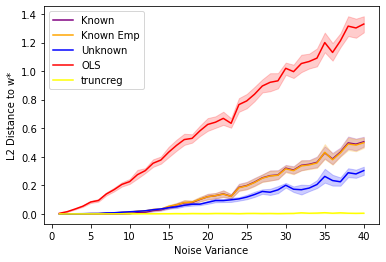

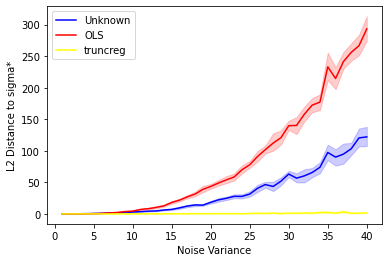

In [29]:
sns.lineplot(data=logs, x='var', y='known_param_mse', label='Known', color="purple")
sns.lineplot(data=logs, x='var', y='known_emp_param_mse', label='Known Emp', color="orange")

sns.lineplot(data=logs, x='var', y='unknown_param_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='var', y='ols_param_mse', label='OLS', color="red")
ax = sns.lineplot(data=logs, x='var', y='trunc_reg_param_mse', label='truncreg', color="yellow")
ax.set(xlabel='Noise Variance', ylabel='L2 Distance to w*')
plt.show()

# sns.lineplot(data=logs, x='var', y='known_', label='Known', color="purple")
sns.lineplot(data=logs, x='var', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='var', y='ols_var_mse', label='OLS', color="red")
ax = sns.lineplot(data=logs, x='var', y='trunc_var_mse', label='truncreg', color="yellow")
ax.set(xlabel='Noise Variance', ylabel='L2 Distance to sigma*')
plt.show()

# Samples in Truncation Set

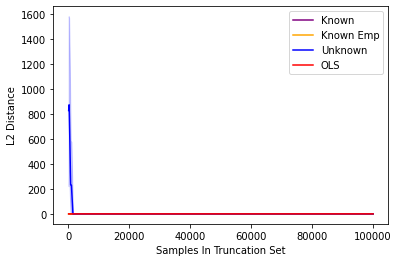

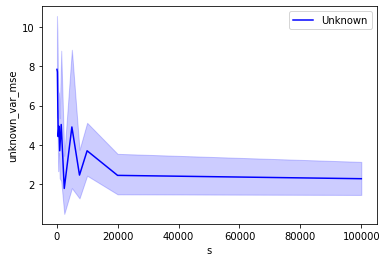

In [31]:
sns.lineplot(data=logs, x='s', y='known_param_mse', label='Known', color="purple")
sns.lineplot(data=logs, x='s', y='known_emp_param_mse', label='Known Emp', color="orange")
sns.lineplot(data=logs, x='s', y='unknown_param_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='s', y='ols_param_mse', label='OLS', color="red")
ax.set(xlabel='Samples In Truncation Set', ylabel='L2 Distance')
plt.show()

# sns.lineplot(data=logs, x='s', y='known_', label='Known', color="purple")
sns.lineplot(data=logs, x='s', y='unknown_var_mse', label='Unknown', color="blue")
# ax = sns.lineplot(data=logs, x='s', y='ols_var_mse', label='OLS', color="red")
ax.set(xlabel='Samples in Truncation Set', ylabel='L2 Distance')
plt.show()

# Varying Truncation Parameter C

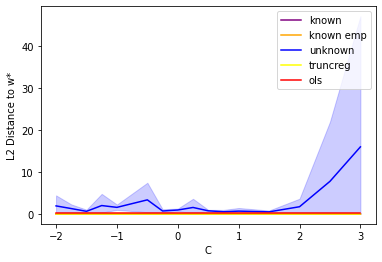

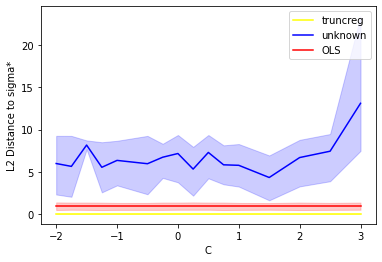

In [18]:
sns.lineplot(data=logs, x='c', y='known_param_mse', label='known', color="purple")
sns.lineplot(data=logs, x='c', y='known_emp_param_mse', label='known emp', color="orange")
sns.lineplot(data=logs, x='c', y='unknown_param_mse', label='unknown', color="blue")
sns.lineplot(data=logs, x='c', y='trunc_reg_param_mse', label='truncreg', color="yellow")
ax = sns.lineplot(data=logs, x='c', y='ols_param_mse', label='ols', color="red")
ax.set(xlabel='C', ylabel='L2 Distance to w*')
plt.show()

sns.lineplot(data=logs, x='c', y='trunc_var_mse', label='truncreg', color="yellow")
sns.lineplot(data=logs, x='c', y='unknown_var_mse', label='unknown', color="blue")
ax = sns.lineplot(data=logs, x='c', y='ols_var_mse', label='OLS', color="red")
ax.set(xlabel='C', ylabel='L2 Distance to sigma*')
plt.show()

In [48]:
ch.nn.MSELoss()(Tensor([trunc_df['x'][2]**2]), Tensor([20]))

tensor(0.0218)

In [27]:
ch.manual_seed(1)
# generate ground truth
ground_truth = ch.nn.Linear(in_features=1, out_features=1, bias=True)
ground_truth.weight = ch.nn.Parameter(U.sample(ch.Size([1, 1])))
ground_truth.bias = ch.nn.Parameter(U.sample(ch.Size([1, 1])))

In [32]:
params = ch.cat([ground_truth.weight, ground_truth.bias])
trunc_params = ch.cat([Tensor([trunc_df['x'][1]]), Tensor([trunc_df['x'][0]])])

In [35]:
trunc_params, params

(tensor([-0.1838,  0.3484]),
 tensor([[-0.1939],
         [ 0.4694]], grad_fn=<CatBackward>))

In [57]:
ch.nn.MSELoss()(trunc_params, params.flatten()), ch.nn.MSELoss()(Tensor([trunc_df['x'][2]])**2, Tensor([20]))

(tensor(0.0074, grad_fn=<MseLossBackward>), tensor(0.0218))

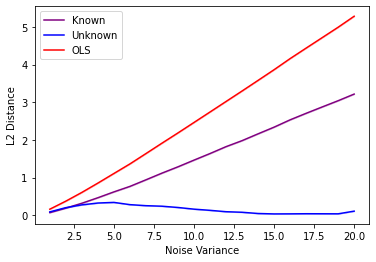

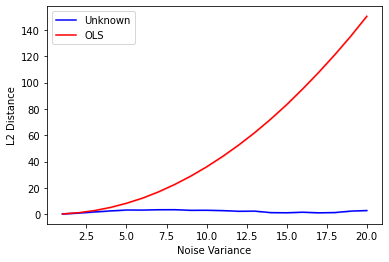

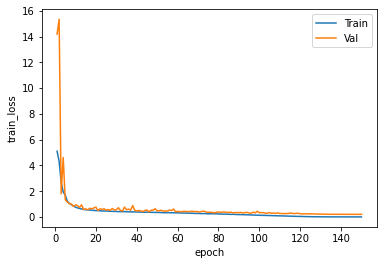

<AxesSubplot:xlabel='epoch', ylabel='train_prec1'>

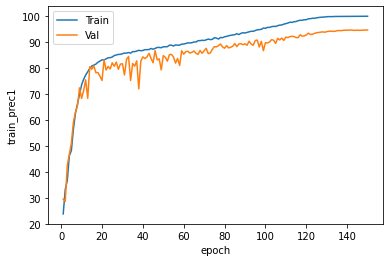

In [41]:
sns.lineplot(data=logs, x='epoch', y='train_loss', label='Train')
sns.lineplot(data=logs, x='epoch', y='val_loss', label='Val')
plt.show()
sns.lineplot(data=logs, x='epoch', y='train_prec1', label='Train')
sns.lineplot(data=logs, x='epoch', y='val_prec1', label='Val')

In [35]:
reader.close()

<AxesSubplot:xlabel='epoch', ylabel='train_prec1'>

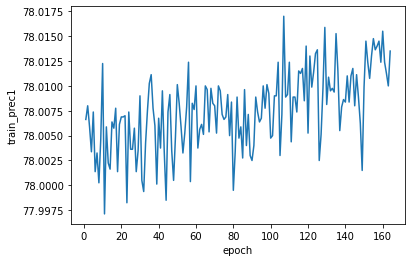

In [20]:
sns.lineplot(data=trunc, x='epoch', y='train_prec1')